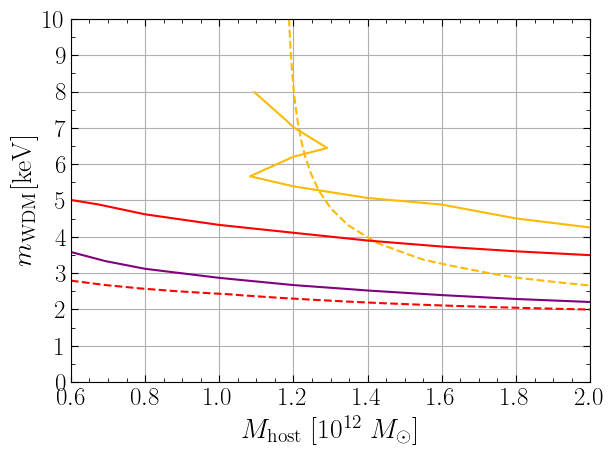

In [8]:
from style import *
import numpy as np




Vpeak = 4
Nsat_V_arr = np.load("./data/Nsat_v_%e.npy" % (Vpeak))
m_wdm_V_arr = np.load("./data/m_wdm_v_%e.npy" % (Vpeak))
Mhost_0_V_arr = np.load("./data/M_host_v_%e.npy" % (Vpeak))



fig = plt.figure(1)
ax =fig.add_subplot(111)

MPEAK = 1e8
Nsat_arr = np.load("./data/Nsat_M_%e.npy" % (MPEAK))
m_wdm_arr = np.load("./data/m_wdm_M_%e.npy" % (MPEAK))
Mhost_0_arr = np.load("./data/M_host_M_%e.npy" % (MPEAK))
cp1 = ax.contour(Mhost_0_arr/1e12,
                  m_wdm_arr,
                  Nsat_arr,levels=[0,244],colors="#fcba03")


Nsat_PS_arr = np.load("./data/Nsat_M_PS_%e.npy" % (MPEAK))
m_wdm_PS_arr = np.load("./data/m_wdm_M_PS_%e.npy" % (MPEAK))
Mhost_0_PS_arr = np.load("./data/M_host_M_PS_%e.npy" % (MPEAK))
cp4 = ax.contour(Mhost_0_PS_arr/1e12,
                  m_wdm_PS_arr,
                  Nsat_PS_arr,levels=[0,244],colors="#fcba03",linestyles="--")

MPEAK = 1e5
Nsat_arr = np.load("./data/Nsat_M_%e.npy" % (MPEAK))
m_wdm_arr = np.load("./data/m_wdm_M_%e.npy" % (MPEAK))
Mhost_0_arr = np.load("./data/M_host_M_%e.npy" % (MPEAK))
cp1 = ax.contour(Mhost_0_arr/1e12,
                  m_wdm_arr,
                  Nsat_arr,levels=[0,244],colors="red")

Nsat_PS_arr = np.load("./data/Nsat_M_PS_%e.npy" % (MPEAK))
m_wdm_PS_arr = np.load("./data/m_wdm_M_PS_%e.npy" % (MPEAK))
Mhost_0_PS_arr = np.load("./data/M_host_M_PS_%e.npy" % (MPEAK))
cp4 = ax.contour(Mhost_0_PS_arr/1e12,
                  m_wdm_PS_arr,
                  Nsat_PS_arr,levels=[0,244],colors="red",linestyles="--")



ax.set_xlabel("$M_{\\rm host}\\ [10^{12}\\ M_\\odot]$",fontsize=20)
ax.set_ylabel("$ m _{\\rm WDM}[{\\rm keV}]$",fontsize=20)

ax.set_ylim([0,10])
ax.set_xlim([.6,2])
set_xlinticks(ax,0.2,0.05)
set_ylinticks(ax,1,0.5)

cp2 = ax.contour(Mhost_0_V_arr/1e12,
                  m_wdm_V_arr,
                  Nsat_V_arr,levels=[0,79],colors="purple")
ax.grid()
fig.tight_layout()

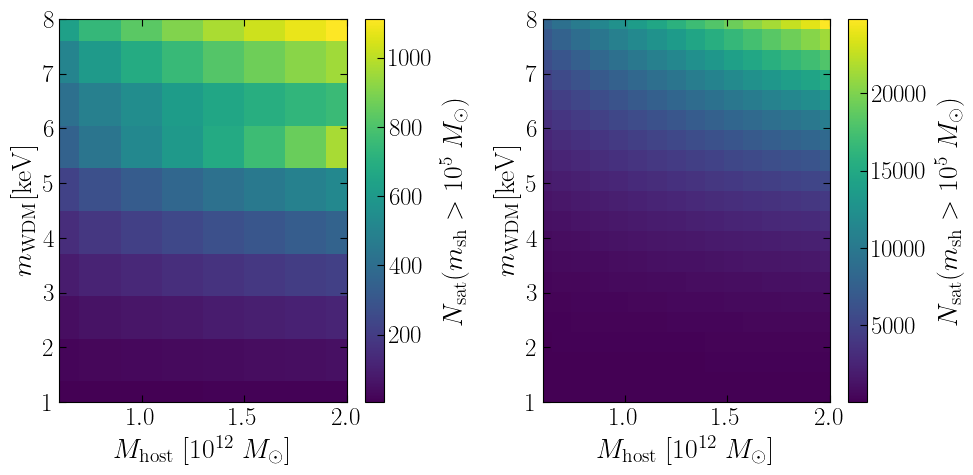

In [17]:
MPEAK = 1e5
Nsat_arr = np.load("./data/Nsat_M_%e.npy" % (MPEAK))
m_wdm_arr = np.load("./data/m_wdm_M_%e.npy" % (MPEAK))
Mhost_0_arr = np.load("./data/M_host_M_%e.npy" % (MPEAK))


Nsat_PS_arr = np.load("./data/Nsat_M_PS_%e.npy" % (MPEAK))
m_wdm_PS_arr = np.load("./data/m_wdm_M_PS_%e.npy" % (MPEAK))
Mhost_0_PS_arr = np.load("./data/M_host_M_PS_%e.npy" % (MPEAK))



fig = plt.figure(1,figsize=(10,5))
ax =fig.add_subplot(121)

 
cp1 = ax.pcolor(Mhost_0_arr/1e12,
                  m_wdm_arr,
                  Nsat_arr)
cb1 = fig.colorbar(cp1)
cb1.set_label('$N_{\\rm sat}(m_{\\rm  sh}>10^{%d}\\ M_\\odot) $'%np.log10(MPEAK),fontsize=20)
ax.set_xlabel("$M_{\\rm host}\\ [10^{12}\\ M_\\odot]$",fontsize=20)
ax.set_ylabel("$ m _{\\rm WDM}[{\\rm keV}]$",fontsize=20)

ax.set_ylim([1,8])
ax.set_xlim([.6,2])

ax2 = fig.add_subplot(122)

 
cp2 = ax2.pcolor(Mhost_0_PS_arr/1e12,
                  m_wdm_PS_arr,
                  Nsat_PS_arr)
cb2 = fig.colorbar(cp2)
cb2.set_label('$N_{\\rm sat}(m_{\\rm  sh}>10^{%d}\\ M_\\odot) $'%np.log10(MPEAK),fontsize=20)

ax2.set_xlabel("$M_{\\rm host}\\ [10^{12}\\ M_\\odot]$",fontsize=20)
ax2.set_ylabel("$ m _{\\rm WDM}[{\\rm keV}]$",fontsize=20)

ax2.set_ylim([1,8])
ax2.set_xlim([.6,2])

fig.tight_layout()

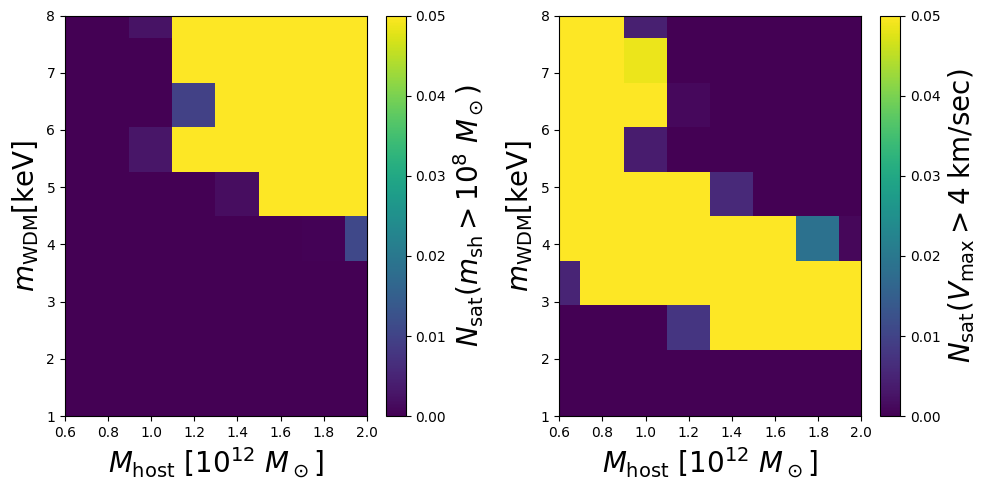

In [87]:
Nsat_arr = np.load("./data/Nsat_M_%e.npy" % (MPEAK))
m_wdm_arr = np.load("./data/m_wdm_M_%e.npy" % (MPEAK))
Mhost_0_arr = np.load("./data/M_host_M_%e.npy" % (MPEAK))


Nsat_V_arr = np.load("./data/Nsat_v_%e.npy" % (Vpeak))
m_wdm_V_arr = np.load("./data/m_wdm_v_%e.npy" % (Vpeak))
Mhost_0_V_arr = np.load("./data/M_host_v_%e.npy" % (Vpeak))

def exclusion(Nsat,Nobs):
    Narr = np.arange(Nobs,2*Nobs)
    prob_arr = (Nsat/Narr)**Narr * np.exp(-Nsat+Narr) / np.sqrt(2*np.pi * Narr)
    return np.sum(prob_arr) # probability of observing Nobs or more satellites given Nsat


exclusion_M = np.array([exclusion(Nsat,270) for Nsat in Nsat_arr.flatten()]).reshape(Nsat_arr.shape)
exclusion_V = np.array([exclusion(Nsat,94) for Nsat in Nsat_V_arr.flatten()]).reshape(Nsat_V_arr.shape)



fig = plt.figure(1,figsize=(10,5))
ax =fig.add_subplot(121)

 
cp1 = ax.pcolor(Mhost_0_arr/1e12,
                  m_wdm_arr,
                  exclusion_M,vmax=0.05)
cb1 = fig.colorbar(cp1)
cb1.set_label('$N_{\\rm sat}(m_{\\rm  sh}>10^{8}\\ M_\\odot) $',fontsize=20)
ax.set_xlabel("$M_{\\rm host}\\ [10^{12}\\ M_\\odot]$",fontsize=20)
ax.set_ylabel("$ m _{\\rm WDM}[{\\rm keV}]$",fontsize=20)

ax.set_ylim([1,8])
ax.set_xlim([.6,2])

ax2 = fig.add_subplot(122)

 
cp2 = ax2.pcolor(Mhost_0_V_arr/1e12,
                  m_wdm_V_arr,
                  exclusion_V,vmax=0.05)
cb2 = fig.colorbar(cp2)
cb2.set_label('$N_{\\rm sat}(V_{\\rm  max}>4\\ {\\rm km/sec}) $',fontsize=20)

ax2.set_xlabel("$M_{\\rm host}\\ [10^{12}\\ M_\\odot]$",fontsize=20)
ax2.set_ylabel("$ m _{\\rm WDM}[{\\rm keV}]$",fontsize=20)

ax2.set_ylim([1,8])
ax2.set_xlim([.6,2])

fig.tight_layout()